<a href="https://colab.research.google.com/github/cristofer-ulate/azure-open-ai-call/blob/main/AzureOpenAI_Call.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install openai

### Configurando secretos

In [20]:
from google.colab import userdata
azure_endpoint = userdata.get('AZURE_OPENAI_ENDPOINT')
api_key = userdata.get('AZURE_OPENAI_API_KEY')

In [6]:
print(azure_endpoint)

https://crisu-me99nh7j-eastus2.cognitiveservices.azure.com/openai/responses?api-version=2025-04-01-preview


## Configurando el cliente de Azure OpenAI

In [21]:
import os
from openai import AzureOpenAI

client = AzureOpenAI(
  azure_endpoint = azure_endpoint,
  api_key=api_key,
  api_version="2025-03-01-preview"
)

model_name = "gpt-5-mini"
deployment = "gpt-5-mini"

### Usemos nuestro modelo

In [22]:
completion = client.responses.create(
    model="gpt-5-mini",
    input=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "I am going to Paris, what should I see?"}
    ],
    max_output_tokens=16384
)

print(completion.output_text)



Great — Paris has a lot to offer. A few quick questions that will help me tailor suggestions: how many days will you be there, and what are your interests (art, history, food, shopping, romantic strolls, nightlife, family-friendly)?

Meanwhile, here’s a compact guide to sights and experiences, plus practical tips.

Top must-sees
- Eiffel Tower — visit the summit (book tickets in advance) or enjoy the view from Trocadéro. See the nightly light show.
- Louvre Museum — world’s largest museum (reserve a timed ticket; peak crowds mid-day).
- Musée d’Orsay — Impressionist masterpieces in a former railway station.
- Notre-Dame & Île de la Cité — exterior and nearby Sainte‑Chapelle (stained glass) — check restoration/opening status before you go.
- Montmartre & Sacré‑Cœur — bohemian quarter with great panoramas and artists’ square.
- Arc de Triomphe & Champs‑Élysées — climb the Arc for an iconic view down the grand avenue.
- Seine river cruise — scenic way to see many landmarks at once (especi

## Modelos de imagen

### Configurando secretos

In [8]:
from google.colab import userdata
azure_image_endpoint = userdata.get('AZURE_OPENAI_DALLE_ENDPOINT')
images_api_key = userdata.get('AZURE_OPENAI_DALLE_API_KEY')

### Configurando el cliente de Azure OpenAI para el modelo de imágenes

In [9]:
imageClient = AzureOpenAI(
  azure_endpoint = azure_image_endpoint,
  api_key=images_api_key,
  api_version="2024-04-01-preview"
)

### Uso del modelo

In [15]:
import requests
from PIL import Image
from IPython.display import display
import json

result = imageClient.images.generate(
    model="dall-e-3", # the name of your DALL-E 3 deployment
    prompt="Developers working in a software company called Sapiens in Costa Rica",
    n=1
)

json_response = json.loads(result.model_dump_json())

In [16]:
# Set the directory for the stored image
image_dir = os.path.join(os.curdir, 'images')

# If the directory doesn't exist, create it
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# Initialize the image path (filetype should be png)
image_path = os.path.join(image_dir, 'generated_image.png')

In [17]:
# Retrieve the generated image
image_url = json_response["data"][0]["url"]  # extract image URL from response
generated_image = requests.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

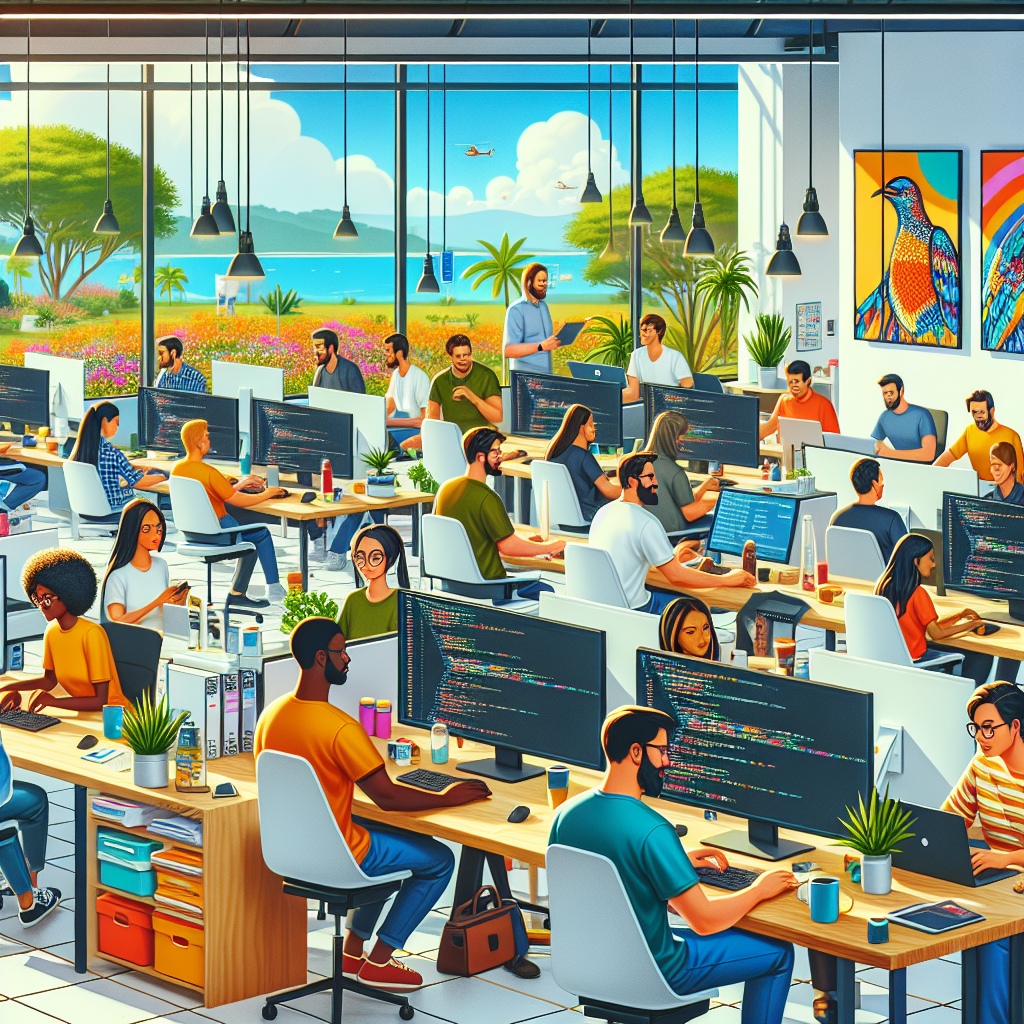

In [18]:
# Display the image in the default image viewer
image = Image.open(image_path)
display(image)